In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
#sns.set_context('poster')
rcParams['lines.linewidth']=1

In [12]:
from kid_readout.interactive import *

INFO: 2016-06-20 08:42:43,254 - kid_readout.<module>:13  kid_readout logging setup with default stream handler


In [3]:
fns = ['/artemis/readout/2016-06-19_223038_scan_lo_830.0_MHz.nc', '/artemis/readout/2016-06-19_223140_scan_lo_1020.0_MHz.nc', '/artemis/readout/2016-06-19_223243_scan_lo_1210.0_MHz.nc', '/artemis/readout/2016-06-19_223346_scan_lo_1400.0_MHz.nc']


In [4]:
import glob

In [19]:
glob.glob('/artemis/readout/2016-06*830*.nc')

['/artemis/readout/2016-06-18_212830_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-19_223038_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-19_224847_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-19_232127_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-19_235205_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_002242_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_005320_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_102219_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_104258_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_130004_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_130324_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_134141_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_142949_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_155335_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_160712_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_162507_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_164057_sca

In [22]:
!ls -lhtr /artemis/readout/2016-06-20_174449_scan_lo_1020.0_MHz.nc

-rwxrwxr-x 1 500 500 514M Jun 20 17:45 /artemis/readout/2016-06-20_174449_scan_lo_1020.0_MHz.nc


In [15]:
def get_fractional_frequency_response(folded):
    period = folded.shape[-1]
    template = np.ones((period,),dtype='float')
    template[:period//2] = -1
    response = np.abs(np.fft.ifft(np.fft.fft(template)*np.fft.fft(folded,axis=-1),axis=-1)*2./period).max(-1)
    return response

In [23]:
fns = [
 '/artemis/readout/2016-06-19_223038_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_002242_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_005320_scan_lo_830.0_MHz.nc',
'/artemis/readout/2016-06-20_102219_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_104258_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_130004_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_130324_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_134141_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_142949_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_155335_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_160712_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_162507_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_164057_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_165419_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_171740_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_172127_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_172514_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_172900_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_173246_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_173634_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_174021_scan_lo_830.0_MHz.nc',
 '/artemis/readout/2016-06-20_174408_scan_lo_830.0_MHz.nc']

In [24]:
sas = []
ncs = []
for fn in fns:
    nc = NCFile(fn)
    ncs.append(nc)
    sas.append(nc.SweepArray0)

In [36]:
s21all = np.array([sa.s21_point for sa in sas])[1:,:]

In [37]:
bl = np.abs(s21all).max(0)

In [38]:
s21alln = s21all/bl

In [29]:
s21all.shape

(22, 16384)

<IPython.core.display.Javascript object>


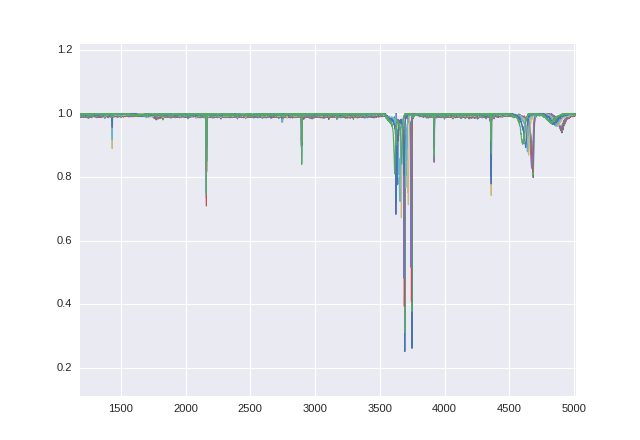

In [63]:
_=plot(np.abs(s21alln[9:-4,:]).T)

In [67]:
881.7/881.26

1.0004992851144952

<IPython.core.display.Javascript object>


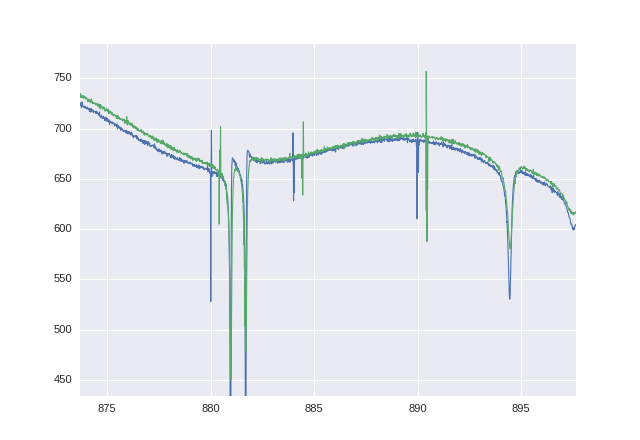

In [69]:
plot(sa.frequency_MHz,np.abs(s21all[9,:]))
plot(sa.frequency_MHz*1.0004992851144952,np.abs(s21all[13,:]))


<IPython.core.display.Javascript object>


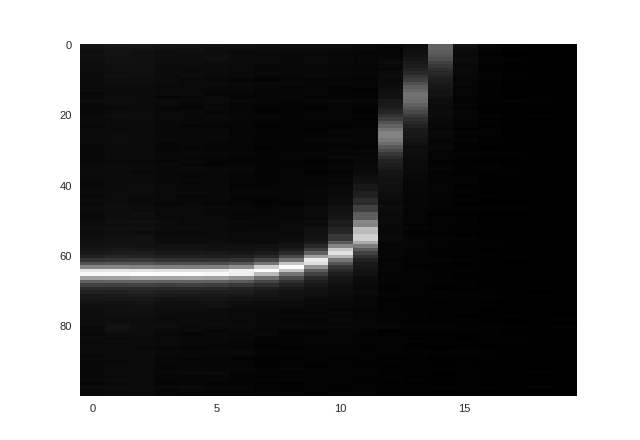

In [55]:
imshow(np.abs(s21alln[1:,14800:14900]).T,aspect='auto',interpolation='nearest')
grid(False)

<IPython.core.display.Javascript object>


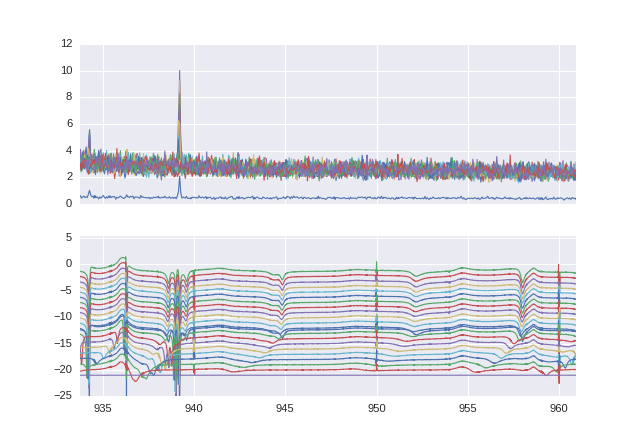

In [27]:
#figure()#(figsize=(18,6))
fig,(ax1,ax2) = subplots(2,1,sharex=True)
for k,sa in enumerate(sas):
    fold = sa.s21_raw.reshape(sa.s21_raw.shape[0],-1,256).mean(1)
    response = get_fractional_frequency_response(fold)
    ax1.plot(sa.frequency_MHz.reshape((-1,4)).mean(1),response.reshape((-1,4)).mean(1))
    ax2.plot(sa.frequency_MHz,20*np.log10(np.abs(sa.s21_point/(np.abs(sas[-1].s21_point))))-k)
#axvline(1016)

In [17]:
19+18+17+16+15+14+13+12+11+10

145

In [18]:
145*2

290